In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

x = pd.read_csv('/content/drive/MyDrive/TataSteel10years.csv')
x['Date'] = pd.to_datetime(x['Date'], format='%m/%d/%Y')
reversed_x = x.iloc[::-1]
x_sorted = reversed_x.reset_index(drop=True)

x_sorted['Date'] = pd.to_datetime(x_sorted['Date'])
df = x_sorted[['Date', 'Price']]
df.set_index('Date', inplace=True)


Mounted at /content/drive


In [2]:
# Fit ARIMA model
model = ARIMA(df['Price'], order=(1, 1, 0))
fit = model.fit()

# Forecast next 7 days
forecast = fit.forecast(steps=7)
forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(days=1), periods=7)

# Create a DataFrame for the forecasted values
forecast_df = pd.DataFrame({'Date': forecast_index, 'Forecasted Price': forecast})

print(forecast_df)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

           Date  Forecasted Price
2588 2024-06-20        179.999625
2589 2024-06-21        179.999625
2590 2024-06-22        179.999625
2591 2024-06-23        179.999625
2592 2024-06-24        179.999625
2593 2024-06-25        179.999625
2594 2024-06-26        179.999625


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [3]:
# Extract actual values and forecasted values aligned by dates
actual_values = df['Price'].values[-7:]  # Last 7 days from the original data
forecasted_values = forecast_df['Forecasted Price'].values  # Forecasted values for next 7 days

# Calculate evaluation metrics
mae = mean_absolute_error(actual_values, forecasted_values)
mse = mean_squared_error(actual_values, forecasted_values)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 1.5260890784390833
Mean Squared Error (MSE): 3.5092009597143345
Root Mean Squared Error (RMSE): 1.8732861393055613


Mean Squared Error (MSE): 3.4396928046549324


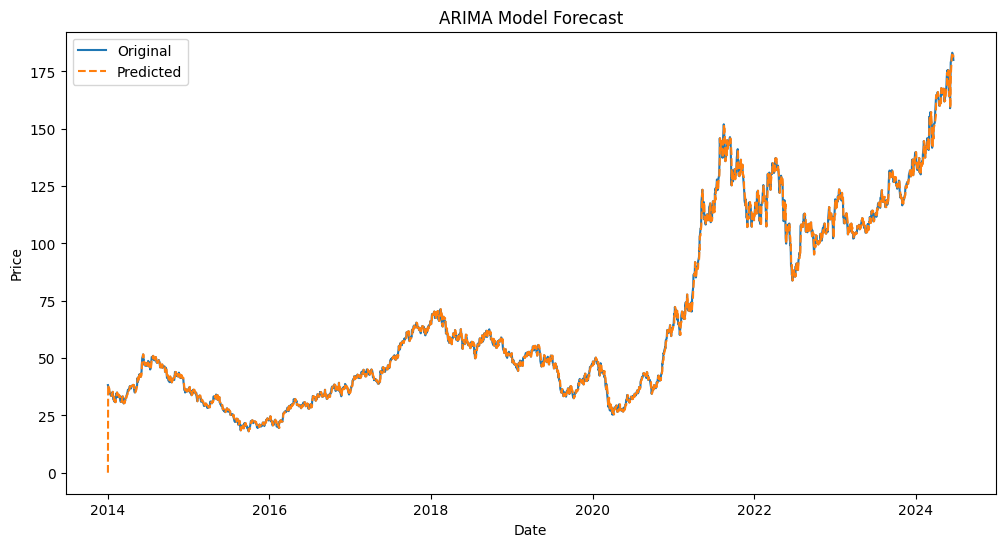

In [4]:
predictions = fit.predict()

# Plotting original data and predictions
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Price'], label='Original')
plt.plot(df.index, predictions, label='Predicted', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('ARIMA Model Forecast')
plt.legend()
plt.show()

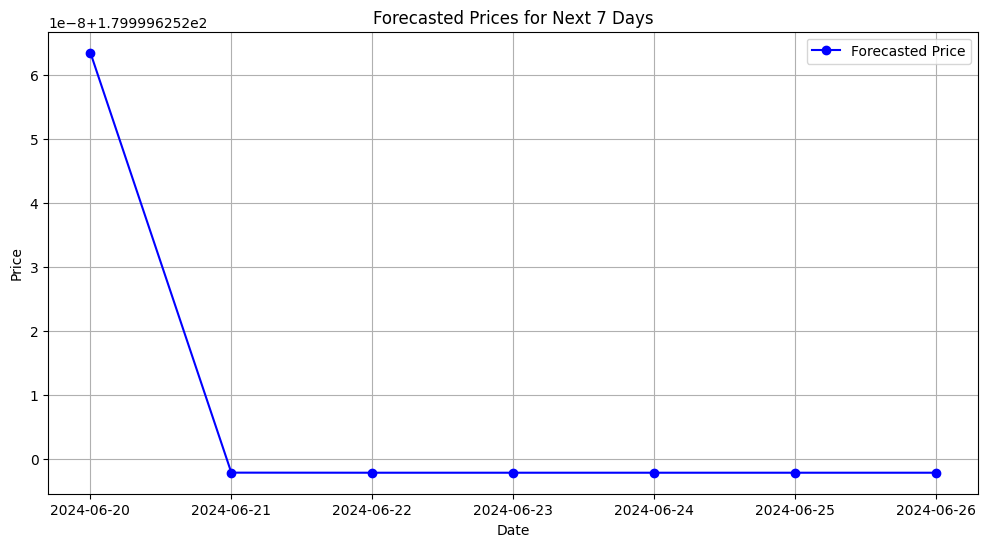

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(forecast_df['Date'], forecast_df['Forecasted Price'], marker='o', linestyle='-', color='b', label='Forecasted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Forecasted Prices for Next 7 Days')
plt.grid(True)
plt.legend()
plt.show()

# -----------


In [ ]:
!pip install pmdarima
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [ ]:
stock_data = pd.read_csv(
    '/content/TISC Historical Data.csv')
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

In [ ]:
stock_data = stock_data.iloc[::-1]
stock_data = stock_data.reset_index(drop=True)
stock_data.set_index('Date', inplace=True)

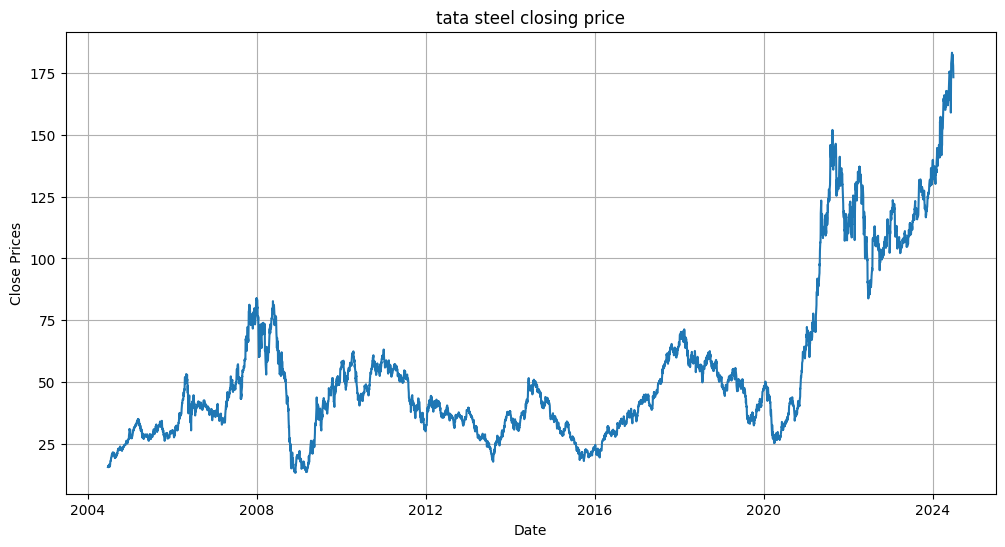

In [ ]:
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(stock_data['Price'])
plt.title('tata steel closing price')
plt.show()

<Axes: ylabel='Density'>

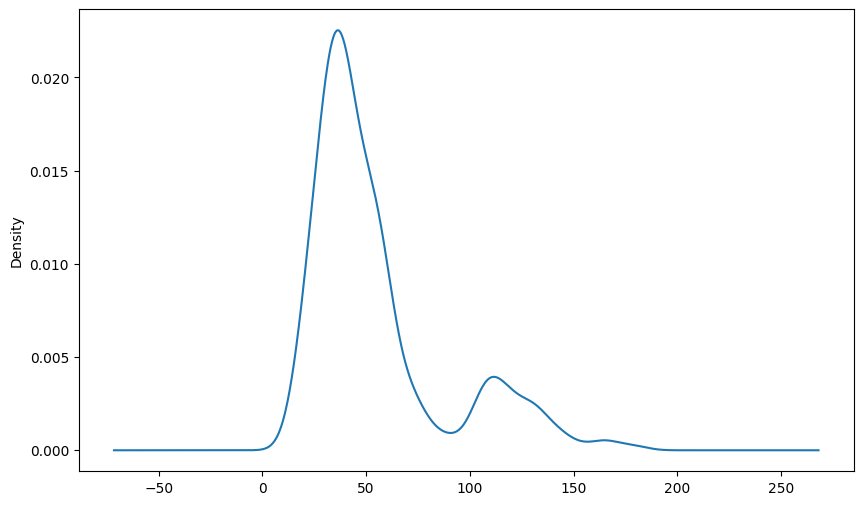

In [ ]:
df_close = stock_data['Price']
df_close.plot(kind='kde')

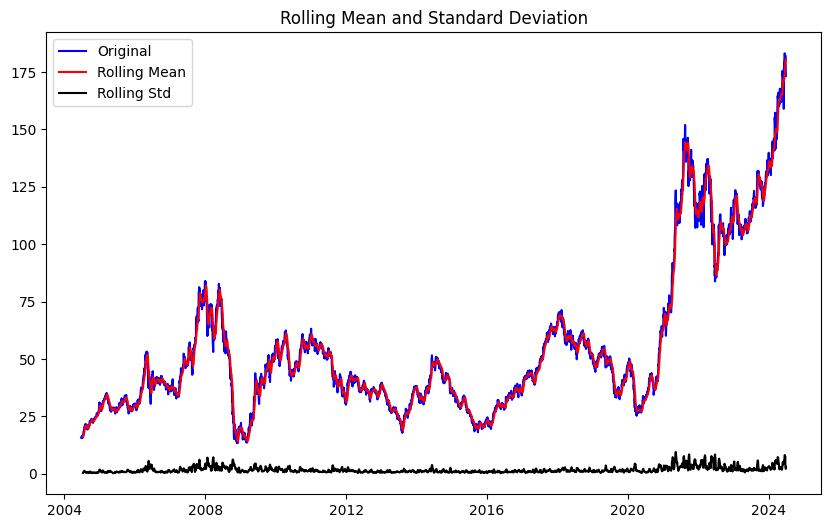

Results of dickey fuller test
Test Statistics                   0.112484
p-value                           0.966903
No. of lags used                 31.000000
Number of observations used    4933.000000
critical value (1%)              -3.431676
critical value (5%)              -2.862126
critical value (10%)             -2.567082
dtype: float64


In [ ]:
def test_stationarity(timeseries):

    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')

    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

test_stationarity(df_close)

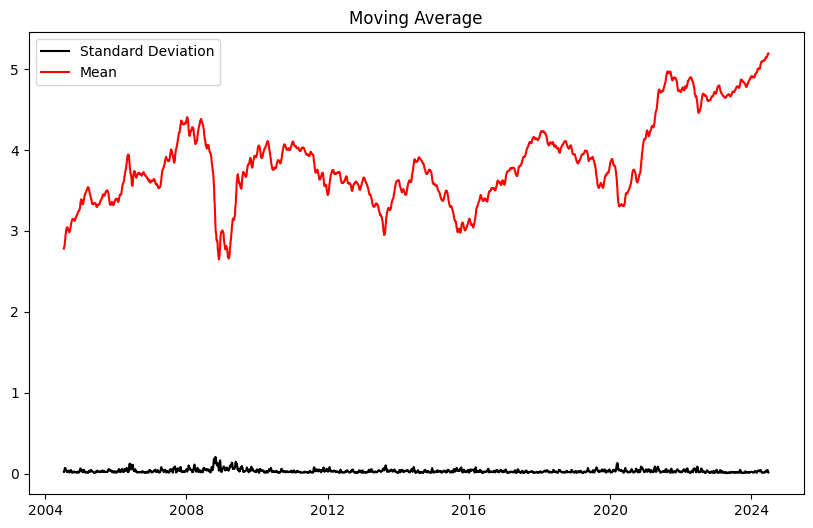

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

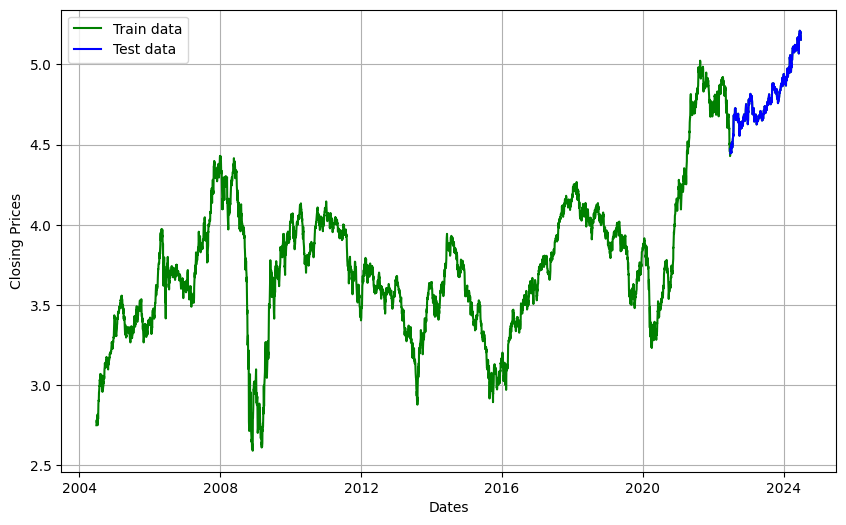

In [ ]:
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-19500.080, Time=0.49 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-19505.454, Time=0.48 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-19505.365, Time=1.51 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-19501.242, Time=0.50 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-19503.597, Time=1.41 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-19503.643, Time=2.28 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-19501.588, Time=2.79 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-19506.681, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-19504.833, Time=0.39 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-19504.882, Time=0.26 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-19506.588, Time=1.13 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-19502.824, Time=1.80 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 13.247 seconds
                               SARIMAX Results                 

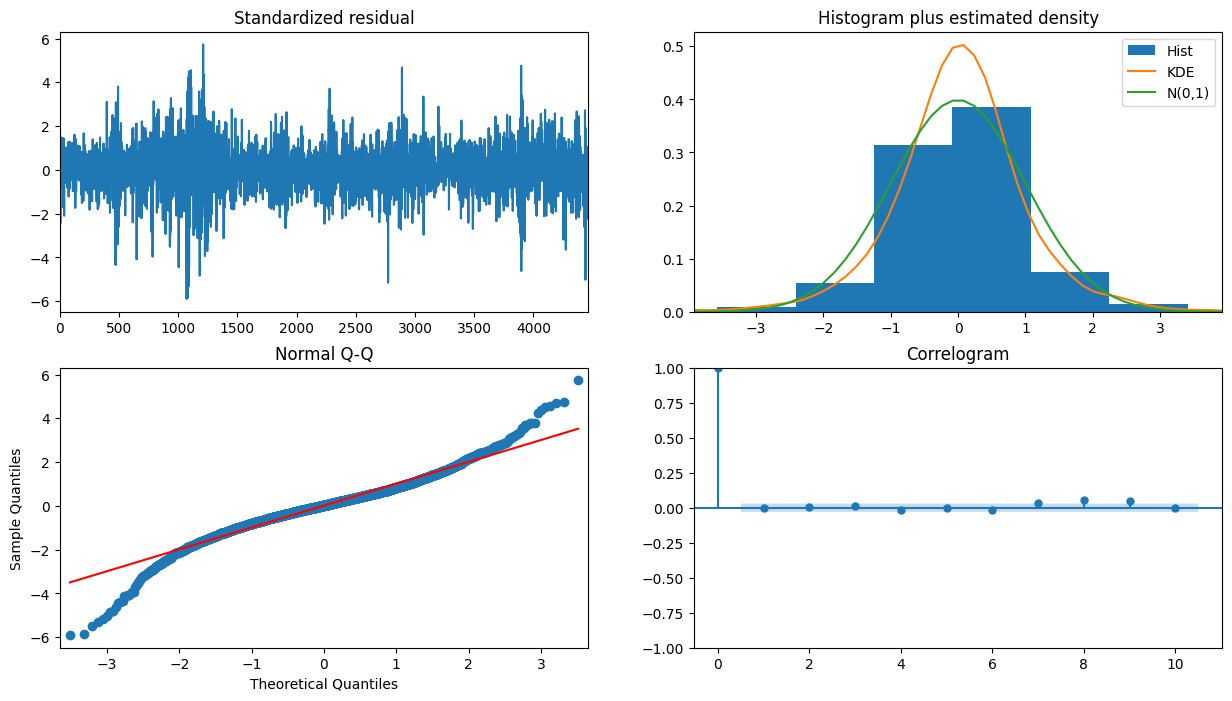

In [ ]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [ ]:
model = ARIMA(train_data, order=(1,1,0))
fitted = model.fit()
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 4465
Model:                 ARIMA(1, 1, 0)   Log Likelihood                9755.341
Date:                Wed, 26 Jun 2024   AIC                         -19506.681
Time:                        11:11:36   BIC                         -19493.874
Sample:                             0   HQIC                        -19502.166
                               - 4465                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0408      0.010      4.274      0.000       0.022       0.060
sigma2         0.0007   9.65e-06     76.746      0.000       0.001       0.001
Ljung-Box (L1) (Q):                   0.00   Jarque-